In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
df = pd.read_csv("/content/drive/My Drive/EE660/aps_failure_training_set_SMALLER.csv")
print(df.columns)
labels=df['class']
print(df)
df.replace({'na': np.nan}, inplace=True, regex=True)
df.replace('neg', -1, inplace=True)
df.replace('pos', 1, inplace=True)
print('Total number of missing values :',df.isnull().sum().sum())


Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)
      class  aa_000 ab_000 ac_000 ad_000  ...   ee_007   ee_008 ee_009 ef_000 eg_000
0       neg   46658     na   2962     na  ...   193428   285612  11284      0      0
1       neg     280      0     44     22  ...     2910       38      0      0      0
2       neg       8     na      6      6  ...        0        0      0      0      0
3       neg     224      0     48     42  ...     1326        0      0      0      0
4       neg   31622     na    456     na  ...    12494      828      0      0      0
...     ...     ...    ...    ...    ...  ...      ...      ...    ...    ...    ...
19994   pos  569938     na   5022     na  ...   774744  1141694   5018      0      0
19995   pos  741594     na     na   6896  ...  

In [5]:
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,-1,46658,NaN,2962,NaN,0,0,0,0,0,0,38364,964660,1932028,390626,11746,0,1656268,0,0,0,0,0,3077140,2756502,469676,242952,0,0,0,0,3564,630,0,0,0,0,0,183052,1280374,...,NaN,NaN,3582,132,0,0,0,0,0,0,0,0,23706,32940,6644,0,0,130672,27580,5528660,722186,0,0,0,0,45658460,1621.1,1878,569728,736254,441878,211416,372116,297188,218520,193428,285612,11284,0,0
1,-1,280,0,44,22,0,0,0,0,0,1404,2644,24800,24474,0,0,0,19976,0,0,0,1144,3030,51590,43606,27258,3022,0,0,0,0,50,10,0,0,0,0,0,0,0,...,0,27078,200,86,0,608,0,0,0,0,0,0,750,100,28,0,0,1548,320,520,172,0,0,0,0,0,224.98,152,28932,13260,4382,868,1570,1048,314,2910,38,0,0,0
2,-1,8,NaN,6,6,0,0,0,0,0,0,0,0,2274,0,0,0,1030,0,0,0,0,0,6200,5664,1736,274,0,0,0,0,0,4,0,0,0,0,0,0,2274,...,0,1654,12,36,0,0,0,0,0,0,0,0,26,28,4,0,0,14,8,480,48,0,0,0,0,0,13.38,12,1274,806,156,34,4,0,0,0,0,0,0,0
3,-1,224,0,48,42,0,0,0,0,0,0,2096,47562,31194,874,0,0,33014,0,0,0,218,638,100052,88160,80756,2756,0,0,0,0,6,20,0,0,0,0,0,0,0,...,0,25890,244,106,5080,45740,0,0,0,0,0,0,1158,38,8,0,0,1428,282,2880,1218,0,0,0,0,0,544.4,294,59922,13638,3644,674,1096,704,722,1326,0,0,0,0
4,-1,31622,NaN,456,NaN,0,0,0,0,0,0,356,36990,1471402,827546,10094,0,1087148,0,0,0,0,0,1968670,1679818,469222,259038,0,0,0,0,0,0,0,0,0,0,0,3358,162160,...,NaN,NaN,1168,66,0,0,0,54,0,0,0,0,21884,19994,6178,0,0,95922,14822,6575380,686304,387494,18654,0,0,30621590,NaN,NaN,395978,382734,304470,265142,853170,68976,62596,12494,828,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,1,569938,NaN,5022,NaN,0,0,0,0,220,327566,7479072,20942430,17554492,804236,60418,292,23619404,388596,78,0,78850,130414,36450094,27697952,11634970,8238742,0,0,0,0,44214,4880,7767574,3019916,2475192,3821744,3827640,1619604,4872754,...,NaN,NaN,18418,744,0,0,0,0,0,0,0,0,616990,79552,13520,0,0,756944,158678,48768340,10721522,14600464,550548,0,0,201150180,10319.96,12418,5063010,16192748,11737512,3924154,4741206,2279366,1309274,774744,1141694,5018,0,0
19995,1,741594,NaN,NaN,6896,NaN,NaN,0,59672,522892,8075256,24300822,24014152,8067500,1226602,36474,0,21390762,113732,0,NaN,2982468,5120994,47958904,43721472,23956134,6684788,NaN,0,0,0,NaN,NaN,0,0,0,0,0,0,1236,...,0,39539888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19583.02,13720,23391144,8827290,7176524,3125072,6426992,8348820,5266104,3646678,94640,106,NaN,NaN
19996,1,312724,0,1702,1506,0,0,0,2462,312426,3453906,8969682,7908650,2165718,185852,10060,0,9750690,31888,54,0,1359644,2060856,17754526,15934618,6161258,2387690,26,0,0,0,8772,2810,0,0,0,0,0,0,2466,...,0,19105942,37348,14356,0,0,0,0,0,0,0,0,232958,107054,20170,0,0,986106,150228,38560,15064,0,0,0,0,57851530,17417.54,17126,4333758,4957140,2450474,910134,2178956,3907894,2600068,1650210,20122,0,0,0
19997,1,718878,0,NaN,NaN,0,0,0,0,148180,1716386,6819930,4208700,998450,99194,2196,0,20786436,23530,4014,NaN,3005498,4795660,39830094,36354358,13339758,5605510,0,0,0,0,19444,4252,0,0,0,0,0,0,0,...,NaN,NaN,68634,8130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370906,346718,74374,0,0,1434406,193950,47624020,5873914,0,0,0,0,NaN,NaN,2724,4072258,1296226,984792,468628,1168450,2533334,2724704,646702,97942,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Columns: 171 entries, class to eg_000
dtypes: int64(2), object(169)
memory usage: 26.1+ MB


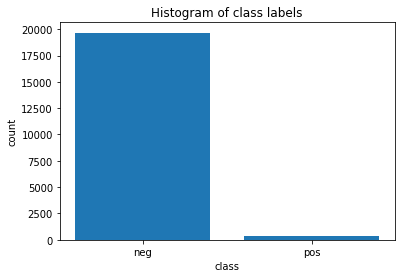

In [6]:
plt.bar(['neg','pos'],df['class'].value_counts())
plt.xlabel('class')
plt.ylabel('count')
plt.title('Histogram of class labels')
df.info()

In [7]:
count_missing_values=[]
for i in df.columns:
    count_missing_values.append(df[i].isnull().sum())
    
print(count_missing_values)

[0, 0, 15489, 1149, 4975, 865, 865, 208, 208, 208, 208, 208, 208, 208, 208, 208, 208, 239, 231, 231, 1515, 242, 231, 242, 205, 242, 205, 937, 231, 231, 231, 864, 864, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 239, 938, 939, 865, 864, 242, 242, 205, 205, 7682, 9107, 13177, 14643, 15426, 15912, 16259, 16420, 264, 55, 254, 254, 1095, 160, 937, 1487, 264, 1096, 246, 864, 4975, 4975, 4975, 120, 120, 120, 3207, 3315, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 4975, 937, 254, 15489, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 4640, 4640, 4640, 4640, 4640, 4640, 4640, 4640, 4640, 864, 938, 1365, 1365, 1365, 1364, 1365, 1364, 1365, 1365, 254, 938, 939, 939, 939, 939, 939, 939, 939, 937, 937, 937, 937, 1365, 3437, 3207, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 937, 937]


In [0]:
df1=df.iloc[:,1:]
train_data=df1.drop(df.columns[(df.isnull().sum()>15000)],axis=1)

In [9]:
missing_data_columns=df.columns[(df.isnull().sum()>15000)]
print(missing_data_columns)
print('List of removed columns with missing value greater than 75%')
for i in missing_data_columns:
    print (i,df[i].isnull().sum())
    
print('Total number of missing values after removing',len(missing_data_columns),'columns is :',(train_data.isnull().sum().sum()))

Index(['ab_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'cr_000'], dtype='object')
List of removed columns with missing value greater than 75%
ab_000 15489
bo_000 15426
bp_000 15912
bq_000 16259
br_000 16420
cr_000 15489
Total number of missing values after removing 6 columns is : 189548


In [10]:
train_data.shape

(19999, 164)

In [0]:
# Imputation using median
impute_median = SimpleImputer(missing_values= np.nan, strategy='median',copy = True, verbose= 2)
train_imputed_median = pd.DataFrame(impute_median.fit_transform(train_data),columns=train_data.columns)
train_imputed_median.to_csv("/content/drive/My Drive/EE660/Train_imputed_median_smaller")
# Imputation using mean
impute_mean = SimpleImputer(missing_values= np.nan, strategy='mean',copy = True, verbose= 2)
train_imputed_mean = pd.DataFrame(impute_mean.fit_transform(train_data),columns=train_data.columns)
train_imputed_mean.to_csv("/content/drive/My Drive/EE660/Train_imputed_mean_smaller")
# Imputation using most frequent
impute_most_frequent = SimpleImputer(missing_values= np.nan, strategy='most_frequent',copy = True, verbose= 2)
train_imputed_most_frequent = pd.DataFrame(impute_most_frequent.fit_transform(train_data),columns=train_data.columns)
train_imputed_most_frequent.to_csv("/content/drive/My Drive/EE660/Train_imputed_most_frequent_smaller")

In [12]:
from imblearn import over_sampling
sm = over_sampling.SMOTE(sampling_strategy='minority',ratio= 1.0)
train_smote, label_smote = sm.fit_sample(train_imputed_mean,labels)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
labels_train_smote=pd.DataFrame({'class':label_smote})
labels_train_smote['class'].value_counts()
labels_train_smote.replace( to_replace=['neg','pos'],value=[-1,1],inplace=True)
labels_train=labels_train_smote['class']

In [14]:
train_data_smote=pd.DataFrame(train_smote,columns=train_data.columns)
train_data_smote

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,4.665800e+04,2.962000e+03,571813.059372,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.836400e+04,9.646600e+05,1.932028e+06,3.906260e+05,11746.000000,0.000000,1.656268e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,3.077140e+06,2.756502e+06,4.696760e+05,2.429520e+05,0.000000,0.000000,0.000000,0.000000,3564.000000,630.000000,0.0,0.0,0.0,0.0,0.000000,1.830520e+05,1.280374e+06,5.957340e+05,1.278264e+06,...,14.061202,2.204056e+06,3582.000000,132.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23706.000000,3.294000e+04,6644.000000,0.000000e+00,0.000000,1.306720e+05,27580.000000,5.528660e+06,7.221860e+05,0.000000e+00,0.000000,0.000000,0.000000,4.565846e+07,1621.100000,1878.000000,5.697280e+05,7.362540e+05,4.418780e+05,2.114160e+05,3.721160e+05,2.971880e+05,2.185200e+05,1.934280e+05,2.856120e+05,11284.000000,0.000000,0.000000
1,2.800000e+02,4.400000e+01,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.404000e+03,2.644000e+03,2.480000e+04,2.447400e+04,0.000000e+00,0.000000,0.000000,1.997600e+04,0.000000,0.000000,0.000000,1.144000e+03,3.030000e+03,5.159000e+04,4.360600e+04,2.725800e+04,3.022000e+03,0.000000,0.000000,0.000000,0.000000,50.000000,10.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,1.262000e+03,5.206000e+04,...,0.000000,2.707800e+04,200.000000,86.000000,0.000000,608.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,750.000000,1.000000e+02,28.000000,0.000000e+00,0.000000,1.548000e+03,320.000000,5.200000e+02,1.720000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,224.980000,152.000000,2.893200e+04,1.326000e+04,4.382000e+03,8.680000e+02,1.570000e+03,1.048000e+03,3.140000e+02,2.910000e+03,3.800000e+01,0.000000,0.000000,0.000000
2,8.000000e+00,6.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.274000e+03,0.000000e+00,0.000000,0.000000,1.030000e+03,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,6.200000e+03,5.664000e+03,1.736000e+03,2.740000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,2.274000e+03,0.000000e+00,0.000000e+00,...,0.000000,1.654000e+03,12.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,2.800000e+01,4.000000,0.000000e+00,0.000000,1.400000e+01,8.000000,4.800000e+02,4.800000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,13.380000,12.000000,1.274000e+03,8.060000e+02,1.560000e+02,3.400000e+01,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
3,2.240000e+02,4.800000e+01,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.096000e+03,4.756200e+04,3.119400e+04,8.740000e+02,0.000000,0.000000,3.301400e+04,0.000000,0.000000,0.000000,2.180000e+02,6.380000e+02,1.000520e+05,8.816000e+04,8.075600e+04,2.756000e+03,0.000000,0.000000,0.000000,0.000000,6.000000,20.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,1.131400e+04,7.041200e+04,...,0.000000,2.589000e+04,244.000000,106.000000,5080.000000,45740.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1158.000000,3.800000e+01,8.000000,0.000000e+00,0.000000,1.428000e+03,282.000000,2.880000e+03,1.218000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,544.400000,294.000000,5.992200e+04,1.363800e+04,3.644000e+03,6.740000e+02,1.096000e+03,7.040000e+02,7.220000e+02,1.326000e+03,0.000000e

In [0]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
std = StandardScaler()
train_std = std.fit_transform(train_smote)

In [0]:
df_test = pd.read_csv("/content/drive/My Drive/EE660/aps_failure_test_set.csv")
labels_test=df_test['class']
df_test.replace({'na': np.nan}, inplace=True, regex=True)
df_test.replace('neg', -1, inplace=True)
df_test.replace('pos', 1, inplace=True)
df_test=df_test.iloc[:,1:]
test_data=df_test.drop(columns=missing_data_columns)

impute_median = SimpleImputer(missing_values= np.nan, strategy='median',copy = True, verbose= 2)
test_imputed_median = pd.DataFrame(impute_median.fit_transform(test_data),columns=test_data.columns)
test_imputed_median.to_csv("/content/drive/My Drive/EE660/Test_imputed_median_smaller")
# Imputation using mean
impute_mean = SimpleImputer(missing_values= np.nan, strategy='mean',copy = True, verbose= 2)
test_imputed_mean = pd.DataFrame(impute_mean.fit_transform(test_data),columns=test_data.columns)
test_imputed_mean.to_csv("/content/drive/My Drive/EE660/Test_imputed_mean_smaller")
# Imputation using most frequent
impute_most_frequent = SimpleImputer(missing_values= np.nan, strategy='most_frequent',copy = True, verbose= 2)
test_imputed_most_frequent = pd.DataFrame(impute_most_frequent.fit_transform(test_data),columns=test_data.columns)
test_imputed_most_frequent.to_csv("/content/drive/My Drive/EE660/Test_imputed_most_frequent_smaller")

labels_test.replace( to_replace=['neg','pos'],value=[-1,1],inplace=True)
test_std=std.transform(test_imputed_mean)


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,f1_score,log_loss,roc_curve,recall_score,precision_recall_curve,precision_score, classification_report,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import itertools

def classifier_output(y_pred_train,labels_train,y_pred_test,labels_test):
    
    #Accuracy score
    print(" Train Accuracy: {0:.3f}".format(float((y_pred_train==labels_train).sum())/float(len(labels_train))))
    print(" Test Accuracy: {0:.3f}".format(float((y_pred_test==labels_test).sum())/float(len(labels_test))))
    
    #Classification Report
    print(" Classification Report: ")
    print(classification_report(labels_test, y_pred_test))
    
    #F1-Score
    print(" Training F1 Score: {0:.3f}".format(f1_score(labels_train, y_pred_train, average='weighted')))
    print(" Testing F1 Score: {0:.3f}".format(f1_score(labels_test, y_pred_test, average='weighted')))
       
    #Confusion Matrix for test data
    con_mat = confusion_matrix(labels_test,y_pred_test,labels=[-1,1])
    print('Confusion Matrix: ', '\n',con_mat)
    print("Type 1 error (False Positive) = ", con_mat[0][1])
    print("Type 2 error (False Negative) = ", con_mat[1][0])
    print("Total cost = ", con_mat[0][1] * 10 + con_mat[1][0] * 500)



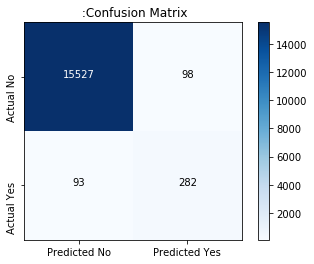

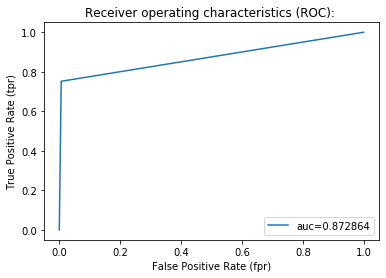

In [82]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm
depth=[10,20,30]
estimators=[50,100,200,250,300]
score_cv=[]
train, valid, y_tr, y_ts = train_test_split(train_std, labels_train, stratify = labels_train, train_size = 0.7)
for i in tqdm(estimators):
  score_c=[]
  for j in depth:
    rf=RandomForestClassifier(max_depth=j , n_estimators=i ,n_jobs=-1 )
    rf.fit(train, y_tr)                  #training our model 
    rf_pred_cv=rf.predict(valid)            #predicting the cv data
    con_mat = confusion_matrix(y_ts,rf_pred_cv,labels=[-1,1]).ravel()
    rf_cv_cost  = con_mat[1]*10 +con_mat[2]*500
    score_c.append(rf_cv_cost)
  score_cv.append(score_c)







  0%|          | 0/5 [00:00<?, ?it/s]





 20%|██        | 1/5 [00:27<01:50, 27.62s/it]





 40%|████      | 2/5 [01:22<01:47, 35.75s/it]





 60%|██████    | 3/5 [03:11<01:55, 57.74s/it]





 80%|████████  | 4/5 [05:26<01:21, 81.08s/it]





100%|██████████| 5/5 [08:10<00:00, 105.77s/it]







In [83]:
score_cv

[[9670, 5520, 5380],
 [10240, 5510, 4900],
 [10160, 5980, 4920],
 [9670, 4990, 4940],
 [10610, 5510, 5430]]

In [105]:
model = RandomForestClassifier(max_depth=30 , n_estimators=100)
model.fit(train_std, labels_train)
    
y_pred_train = model.predict(train_std)
y_pred_test = model.predict(test_std)
con_mat = confusion_matrix(labels_test,y_pred_test,labels=[-1,1]).ravel()
rf_cv_cost  = con_mat[1]*10 +con_mat[2]*500
rf_cv_cost

47140

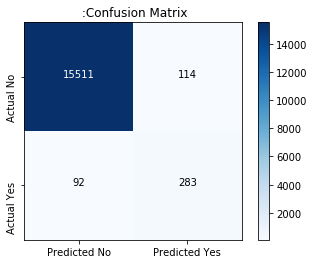

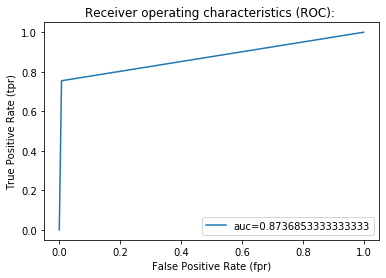

In [106]:
plt.figure()
conf = confusion_matrix(labels_test,y_pred_test,labels=[-1,1])
plt.title(' :Confusion Matrix')
conf=np.reshape(conf,(2,2))
plt.imshow(conf, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Predicted No','Predicted Yes'])
plt.yticks(tick_marks, ['Actual No','Actual Yes'], rotation='vertical')
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
  plt.text(j, i, conf[i, j],horizontalalignment="center",color="white" if conf[i, j] > thresh else "black")
plt.show()

#Visualize ROC-Curve for test data
fpr, tpr, threshold = roc_curve(labels_test, y_pred_test)
plt.figure()
AUC_score_train=roc_auc_score(labels_train, y_pred_train)
AUC_score_test=roc_auc_score(labels_test, y_pred_test)
plt.plot(fpr,tpr, label="auc="+str(AUC_score_test)) 
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title('Receiver operating characteristics (ROC): ')
plt.legend(loc=4)
plt.show()

In [107]:
classifier_output(y_pred_train,labels_train,y_pred_test,labels_test)

 Train Accuracy: 1.000
 Test Accuracy: 0.987
 Classification Report: 
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99     15625
           1       0.71      0.75      0.73       375

    accuracy                           0.99     16000
   macro avg       0.85      0.87      0.86     16000
weighted avg       0.99      0.99      0.99     16000

 Training F1 Score: 1.000
 Testing F1 Score: 0.987
Confusion Matrix:  
 [[15511   114]
 [   92   283]]
Type 1 error (False Positive) =  114
Type 2 error (False Negative) =  92
Total cost =  47140


Text(0, 0.5, 'Precision/Recall')

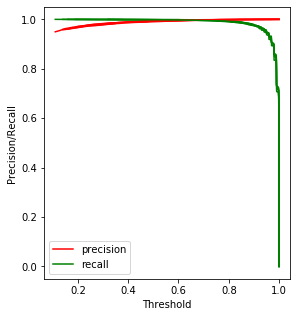

In [89]:
from sklearn.model_selection import train_test_split
trail = 5
plot = []
y_train=labels_train

for x in range(0,trail):
    train, test, y_tr, y_ts = train_test_split(train_std, y_train, stratify = y_train, train_size = 0.7)
    model.fit(train,y_tr)
    pred = model.predict_proba(test)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_ts, pred)
    thresholds = np.append(thresholds,1)
      
    costs = []
    for threshold in thresholds:
        y_pred_thres = pred > threshold
        c = confusion_matrix(y_ts,y_pred_thres)
        cost = c[0,1] * 10 + c[1,0] * 500
        costs.append(cost)
        
    plot.append({'threshold': thresholds, 'precision':precision,'recall': recall, 'costs':costs})
    

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
for x in plot:
    plt.plot(x['threshold'],x['precision'],'r')
    plt.plot(x['threshold'],x['recall'],'g')
    
plt.legend(('precision','recall'))
plt.xlabel('Threshold')
plt.ylabel("Precision/Recall")


In [115]:
model.fit(train_std,labels_train)
y_pred_prob = model.predict_proba(test_std)[:,1]  > 0.1
temp_label=labels_test.replace(inplace=False,value=0,to_replace=-1)
con_mat =confusion_matrix (temp_label, y_pred_prob,labels=[0,1])
print(con_mat)
print("Type 1 error (False Positive) = ", con_mat[0][1])
print("Type 2 error (False Negative) = ", con_mat[1][0])
print("Total cost = ", con_mat[0][1] * 10 + con_mat[1][0] * 500)

[[14669   956]
 [    9   366]]
Type 1 error (False Positive) =  956
Type 2 error (False Negative) =  9
Total cost =  14060


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tqdm import tqdm
C= [10**-3,10**-2,10**-1,1,10**1,10**2,10**3]
penalty=[ 'l1', 'l2']
score_cv=[]
train, valid, y_tr, y_ts = train_test_split(train_std, labels_train, stratify = labels_train, train_size = 0.7)
for i in tqdm(C):
  score_c=[]
  for j in penalty:
    lr=LogisticRegression(penalty=j, C=i)
    lr.fit(train, y_tr)                  #training our model 
    lr_pred_cv=lr.predict(valid)            #predicting the cv data
    con_mat = confusion_matrix(y_ts,lr_pred_cv,labels=[-1,1]).ravel()
    lr_cv_cost  = con_mat[1]*10 +con_mat[2]*500
    score_c.append(lr_cv_cost)
  score_cv.append(score_c)



  0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
 14%|█▍        | 1/7 [00:01<00:09,  1.61s/it]/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
 29%|██▊       | 2/7 [00:03<00:08,  1.80s/it]/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logis

In [19]:
score_cv

[[469520, 273450],
 [176970, 173280],
 [89470, 93960],
 [66910, 77960],
 [65910, 75440],
 [65420, 76960],
 [65410, 73940]]

In [20]:
model1 =LogisticRegression(penalty='l1', C=1000)
model1.fit(train_std, labels_train)
    
y_pred_train = model1.predict(train_std)
y_pred_test = model1.predict(test_std)
con_mat = confusion_matrix(labels_test,y_pred_test,labels=[-1,1]).ravel()
lrf_cv_cost  = con_mat[1]*10 +con_mat[2]*500
lrf_cv_cost

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


32040

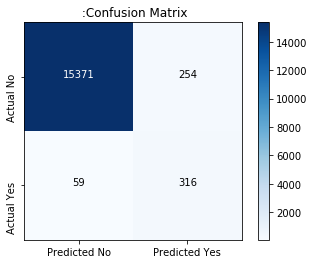

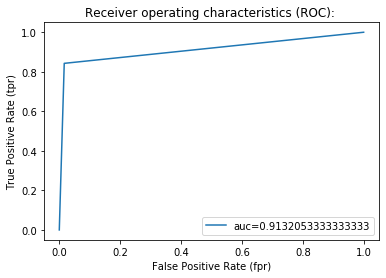

In [21]:
plt.figure()
conf = confusion_matrix(labels_test,y_pred_test,labels=[-1,1])
plt.title(' :Confusion Matrix')
conf=np.reshape(conf,(2,2))
plt.imshow(conf, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Predicted No','Predicted Yes'])
plt.yticks(tick_marks, ['Actual No','Actual Yes'], rotation='vertical')
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
  plt.text(j, i, conf[i, j],horizontalalignment="center",color="white" if conf[i, j] > thresh else "black")
plt.show()

#Visualize ROC-Curve for test data
fpr, tpr, threshold = roc_curve(labels_test, y_pred_test)
plt.figure()
AUC_score_train=roc_auc_score(labels_train, y_pred_train)
AUC_score_test=roc_auc_score(labels_test, y_pred_test)
plt.plot(fpr,tpr, label="auc="+str(AUC_score_test)) 
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title('Receiver operating characteristics (ROC): ')
plt.legend(loc=4)
plt.show()

In [22]:
classifier_output(y_pred_train,labels_train,y_pred_test,labels_test)

 Train Accuracy: 0.983
 Test Accuracy: 0.980
 Classification Report: 
              precision    recall  f1-score   support

          -1       1.00      0.98      0.99     15625
           1       0.55      0.84      0.67       375

    accuracy                           0.98     16000
   macro avg       0.78      0.91      0.83     16000
weighted avg       0.99      0.98      0.98     16000

 Training F1 Score: 0.983
 Testing F1 Score: 0.982
Confusion Matrix:  
 [[15371   254]
 [   59   316]]
Type 1 error (False Positive) =  254
Type 2 error (False Negative) =  59
Total cost =  32040


In [25]:
from sklearn.model_selection import train_test_split
trail = 5
plot = []
y_train=labels_train

for x in range(0,trail):
    train, test, y_tr, y_ts = train_test_split(train_std, y_train, stratify = y_train, train_size = 0.7)
    model1.fit(train,y_tr)
    pred = model1.predict_proba(test)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_ts, pred)
    thresholds = np.append(thresholds,1)
      
    costs = []
    for threshold in thresholds:
        y_pred_thres = pred > threshold
        c = confusion_matrix(y_ts,y_pred_thres)
        cost = c[0,1] * 10 + c[1,0] * 500
        costs.append(cost)
        
    plot.append({'threshold': thresholds, 'precision':precision,'recall': recall, 'costs':costs})
    

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
for x in plot:
    plt.plot(x['threshold'],x['precision'],'r')
    plt.plot(x['threshold'],x['recall'],'g')
    
plt.legend(('precision','recall'))
plt.xlabel('Threshold')
plt.ylabel("Precision/Recall")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KeyboardInterrupt: ignored

In [24]:
model1.fit(train_std,labels_train)
y_pred_prob = model1.predict_proba(test_std)[:,1]  > 0.1
temp_label=labels_test.replace(inplace=False,value=0,to_replace=-1)
con_mat =confusion_matrix (temp_label, y_pred_prob,labels=[0,1])
print(con_mat)
print("Type 1 error (False Positive) = ", con_mat[0][1])
print("Type 2 error (False Negative) = ", con_mat[1][0])
print("Total cost = ", con_mat[0][1] * 10 + con_mat[1][0] * 500)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[14907   718]
 [   38   337]]
Type 1 error (False Positive) =  718
Type 2 error (False Negative) =  38
Total cost =  26180


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tqdm import tqdm
n_neighbors=[1,5,10,50,100,500,1000,10000]
score_cv=[]
train, valid, y_tr, y_ts = train_test_split(train_std, labels_train, stratify = labels_train, train_size = 0.7)
for i in tqdm(n_neighbors):
  nr= KNeighborsClassifier(n_neighbors=i)
  nr.fit(train, y_tr)                  #training our model 
  nr_pred_cv=nr.predict(valid)            #predicting the cv data
  con_mat = confusion_matrix(y_ts,nr_pred_cv,labels=[-1,1]).ravel()
  nr_cv_cost  = con_mat[1]*10 +con_mat[2]*500
  score_cv.append(nr_cv_cost)

100%|██████████| 8/8 [13:12<00:00, 128.04s/it]


In [27]:
score_cv

[570, 2070, 3290, 24720, 90680, 278940, 309290, 1300720]

In [28]:
model2 =KNeighborsClassifier(n_neighbors=1)
model2.fit(train_std, labels_train)
    
y_pred_train = model2.predict(train_std)
y_pred_test = model2.predict(test_std)
con_mat = confusion_matrix(labels_test,y_pred_test,labels=[-1,1]).ravel()
lrf_cv_cost  = con_mat[1]*10 +con_mat[2]*500
lrf_cv_cost

62090

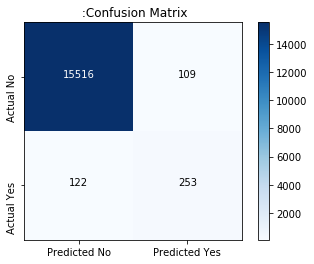

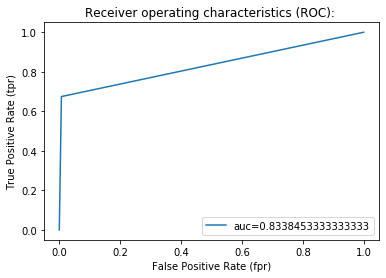

In [29]:
plt.figure()
conf = confusion_matrix(labels_test,y_pred_test,labels=[-1,1])
plt.title(' :Confusion Matrix')
conf=np.reshape(conf,(2,2))
plt.imshow(conf, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Predicted No','Predicted Yes'])
plt.yticks(tick_marks, ['Actual No','Actual Yes'], rotation='vertical')
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
  plt.text(j, i, conf[i, j],horizontalalignment="center",color="white" if conf[i, j] > thresh else "black")
plt.show()

#Visualize ROC-Curve for test data
fpr, tpr, threshold = roc_curve(labels_test, y_pred_test)
plt.figure()
AUC_score_train=roc_auc_score(labels_train, y_pred_train)
AUC_score_test=roc_auc_score(labels_test, y_pred_test)
plt.plot(fpr,tpr, label="auc="+str(AUC_score_test)) 
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title('Receiver operating characteristics (ROC): ')
plt.legend(loc=4)
plt.show()

In [30]:
classifier_output(y_pred_train,labels_train,y_pred_test,labels_test)

 Train Accuracy: 1.000
 Test Accuracy: 0.986
 Classification Report: 
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99     15625
           1       0.70      0.67      0.69       375

    accuracy                           0.99     16000
   macro avg       0.85      0.83      0.84     16000
weighted avg       0.99      0.99      0.99     16000

 Training F1 Score: 1.000
 Testing F1 Score: 0.985
Confusion Matrix:  
 [[15516   109]
 [  122   253]]
Type 1 error (False Positive) =  109
Type 2 error (False Negative) =  122
Total cost =  62090


Text(0, 0.5, 'Precision/Recall')

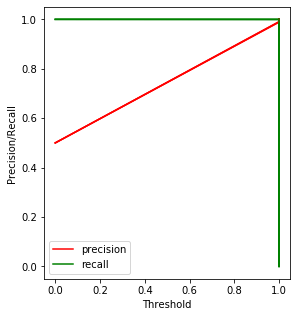

In [31]:
from sklearn.model_selection import train_test_split
trail = 5
plot = []
y_train=labels_train

for x in range(0,trail):
    train, test, y_tr, y_ts = train_test_split(train_std, y_train, stratify = y_train, train_size = 0.7)
    model2.fit(train,y_tr)
    pred = model2.predict_proba(test)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_ts, pred)
    thresholds = np.append(thresholds,1)
      
    costs = []
    for threshold in thresholds:
        y_pred_thres = pred > threshold
        c = confusion_matrix(y_ts,y_pred_thres)
        cost = c[0,1] * 10 + c[1,0] * 500
        costs.append(cost)
        
    plot.append({'threshold': thresholds, 'precision':precision,'recall': recall, 'costs':costs})
    

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
for x in plot:
    plt.plot(x['threshold'],x['precision'],'r')
    plt.plot(x['threshold'],x['recall'],'g')
    
plt.legend(('precision','recall'))
plt.xlabel('Threshold')
plt.ylabel("Precision/Recall")

In [34]:
model2.fit(train_std,labels_train)
y_pred_prob = model2.predict_proba(test_std)[:,1]  > 0.1
temp_label=labels_test.replace(inplace=False,value=0,to_replace=-1)
con_mat =confusion_matrix (temp_label, y_pred_prob,labels=[0,1])
print(con_mat)
print("Type 1 error (False Positive) = ", con_mat[0][1])
print("Type 2 error (False Negative) = ", con_mat[1][0])
print("Total cost = ", con_mat[0][1] * 10 + con_mat[1][0] * 500)

[[15516   109]
 [  122   253]]
Type 1 error (False Positive) =  109
Type 2 error (False Negative) =  122
Total cost =  62090
